<a href="https://colab.research.google.com/github/Siuuuuuu0/ML-DL/blob/main/CaliforniaHousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis & Preprocessing

In [165]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from google.colab import files

In [166]:
files.upload()
df = pd.read_csv('housing.csv')
df.head()

Saving CaliforniaHousingPrices.ipynb to CaliforniaHousingPrices (1).ipynb


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [167]:
df.shape

(20640, 10)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [169]:
df["total_bedrooms"] = df['total_bedrooms'].fillna(df["total_bedrooms"].mean())

In [170]:
df["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

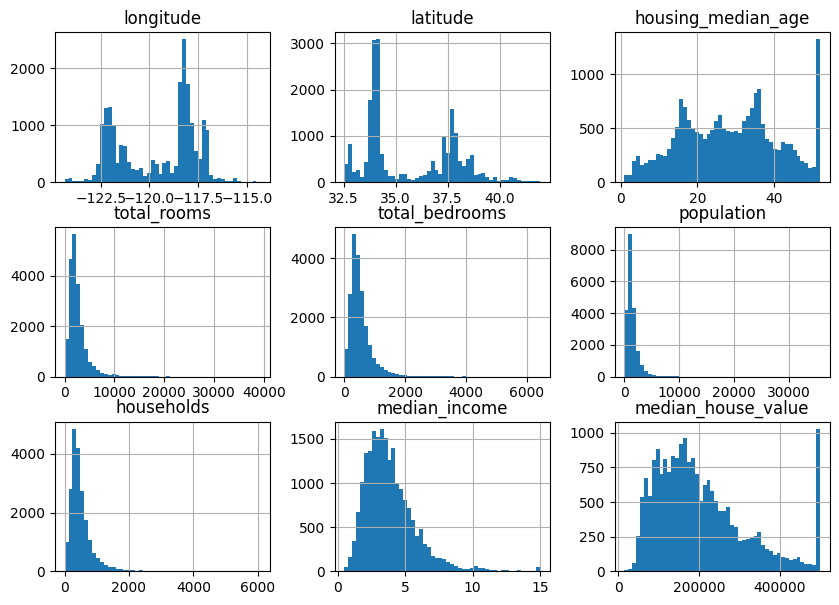

In [171]:
df.hist(bins=50, figsize=(10, 7))

<Axes: xlabel='longitude', ylabel='latitude'>

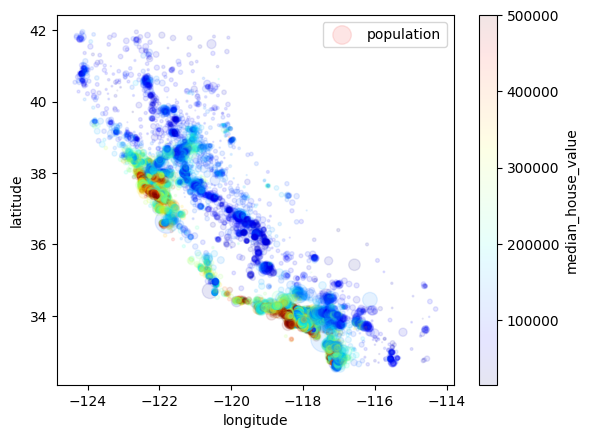

In [172]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, s=df["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"))

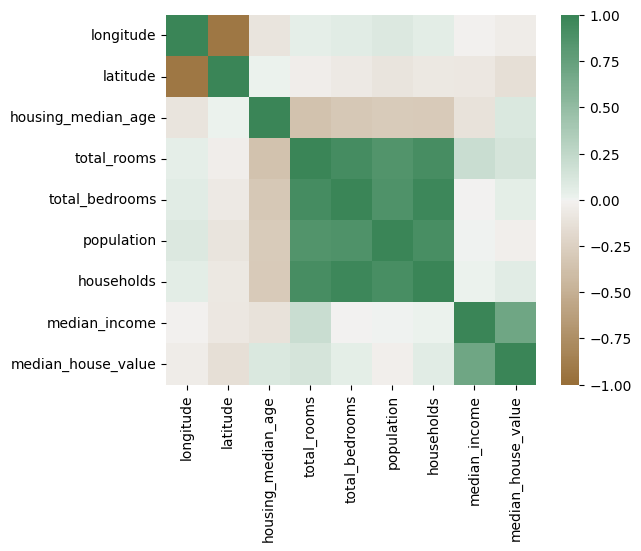

In [173]:
corr_matrix = df.select_dtypes(include="number").corr()
axis_corr = sns.heatmap(
  corr_matrix,
  vmin=-1, vmax=1, center=0,
  cmap=sns.diverging_palette(50, 500, n=500),
  square=True
  )

plt.show()

In [174]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049454
population,-0.024650
longitude,-0.045967
latitude,-0.144160


In [175]:
dummies = pd.get_dummies(df.ocean_proximity)
df = pd.concat([df, dummies], axis="columns")

In [176]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,False,False,False,True,False


In [177]:
df = df.drop(columns=["ocean_proximity", "ISLAND"])

In [178]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [179]:
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# Sklearn Analytical LR

In [181]:
OLS = LinearRegression()

OLS.fit(X_train, y_train)

LinearRegression()

In [182]:
print(f"Intercept is {OLS.intercept_}, coefficients are {OLS.coef_}")

Intercept is -2207160.5500014867, coefficients are [-2.73713958e+04 -2.62767360e+04  1.06248808e+03 -4.49507491e+00
  7.17346985e+01 -4.49069216e+01  8.95695590e+01  3.88017857e+04
 -9.81152584e+04 -1.36935042e+05 -1.01837086e+05 -9.59836253e+04]


In [183]:
print(f"R squared value is {OLS.score(X_train, y_train)}")

R squared value is 0.6463230792601948


In [184]:
y_pred = OLS.predict(X_test)

In [185]:
performance_df = pd.DataFrame({"Predictions":y_pred, "Actual values":y_test})
performance_df["error"] = performance_df["Actual values"] - performance_df["Predictions"]
performance_df.head()

,Predictions,Actual values,error
7506,186414.986391,105400.0,-81014.986391
4720,220241.523080,345300.0,125058.476920
12888,114251.718120,105700.0,-8551.718120
13344,106832.073959,96900.0,-9932.073959
7173,133446.851521,119200.0,-14246.851521


In [186]:
performance_df.reset_index(drop=True, inplace=True)
performance_df.reset_index(inplace=True)
performance_df.head()

,index,Predictions,Actual values,error
0,0,186414.986391,105400.0,-81014.986391
1,1,220241.523080,345300.0,125058.476920
2,2,114251.718120,105700.0,-8551.718120
3,3,106832.073959,96900.0,-9932.073959
4,4,133446.851521,119200.0,-14246.851521


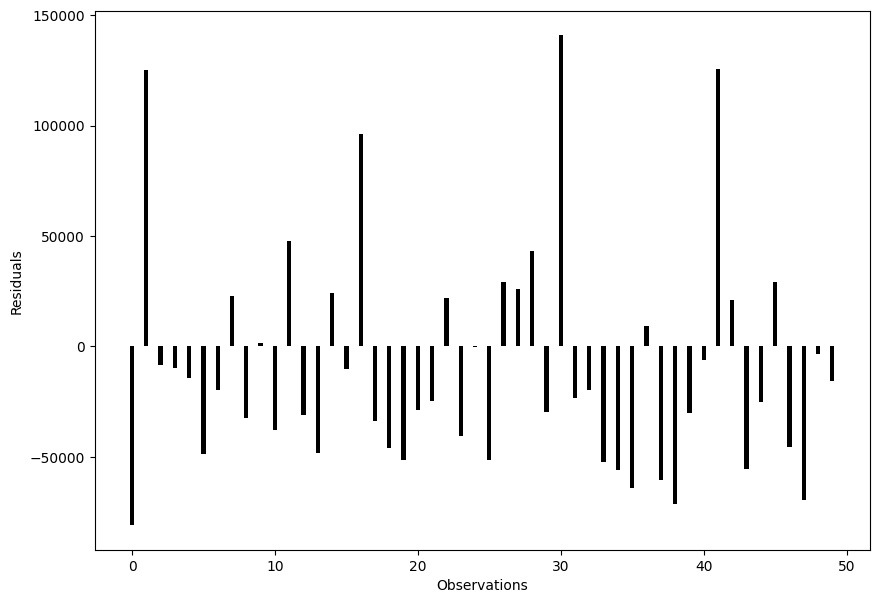

In [187]:
fig = plt.figure(figsize=(10, 7))
plt.bar("index", "error", data=performance_df[:50], color="black", width=0.3)
plt.xlabel("Observations")
plt.ylabel("Residuals")
plt.show()

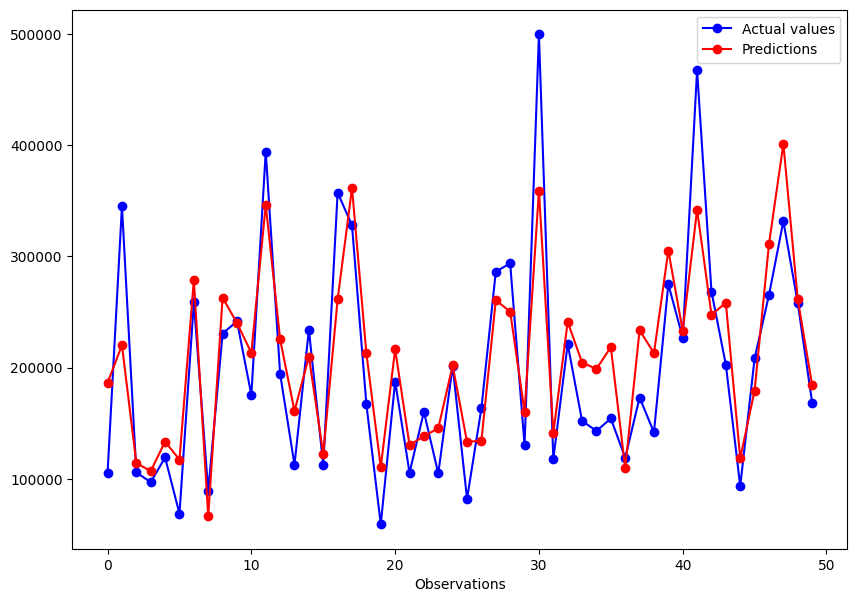

In [188]:
plt.figure(figsize=(10, 7))

plt.plot("index", "Actual values", label='Actual values', color='blue', marker='o', data=performance_df[:50])
plt.plot("index", "Predictions", label='Predictions', color='red', marker='o', data=performance_df[:50])
plt.xlabel("Observations")
plt.legend()
plt.show()

# Sklearn SGD & Epochs Comparison

In [189]:
performance_df_sgd_scaled = pd.DataFrame({"Actual values":y_test})
pipeline = Pipeline([
      ("scaler", StandardScaler()),
      ("sgd", SGDRegressor(max_iter=1, learning_rate="invscaling", eta0=0.01, random_state=52, warm_start=True))
  ])

for epoch in range(10):
  pipeline.named_steps["sgd"].partial_fit(pipeline.named_steps["scaler"].fit_transform(X_train), y_train)

  y_pred_scaled = pipeline.predict(X_test)

  performance_df_sgd_scaled[f"Predictions with {epoch+1} Epochs"] = y_pred_scaled
  performance_df_sgd_scaled[f"Error with {epoch+1} Epochs"] = performance_df_sgd_scaled["Actual values"] - performance_df_sgd_scaled[f"Predictions with {epoch+1} Epochs"]

performance_df_sgd_scaled.reset_index(drop=True, inplace=True)
performance_df_sgd_scaled.reset_index(inplace=True)
performance_df_sgd_scaled.head()

,index,Actual values,Predictions with 1 Epochs,Error with 1 Epochs,Predictions with 2 Epochs,Error with 2 Epochs,Predictions with 3 Epochs,Error with 3 Epochs,Predictions with 4 Epochs,Error with 4 Epochs,Predictions with 5 Epochs,Error with 5 Epochs,Predictions with 6 Epochs,Error with 6 Epochs,Predictions with 7 Epochs,Error with 7 Epochs,Predictions with 8 Epochs,Error with 8 Epochs,Predictions with 9 Epochs,Error with 9 Epochs,Predictions with 10 Epochs,Error with 10 Epochs
0,0,105400.0,183151.164298,-77751.164298,181002.549529,-75602.549529,180596.123307,-75196.123307,180611.408849,-75211.408849,180751.671060,-75351.671060,180925.658273,-75525.658273,181101.253095,-75701.253095,181266.987370,-75866.987370,181419.368447,-76019.368447,181558.092128,-76158.092128
1,1,345300.0,214976.644217,130323.355783,216221.898111,129078.101889,216726.356046,128573.643954,217053.792270,128246.207730,217300.627029,127999.372971,217495.996518,127804.003482,217654.223993,127645.776007,217784.476451,127515.523549,217893.244200,127406.755800,217985.295449,127314.704551
2,2,105700.0,115720.407974,-10020.407974,117090.354436,-11390.354436,117099.557437,-11399.557437,116867.241195,-11167.241195,116607.490543,-10907.490543,116371.259811,-10671.259811,116168.808304,-10468.808304,115998.838749,-10298.838749,115856.973203,-10156.973203,115738.461709,-10038.461709
3,3,96900.0,98798.173267,-1898.173267,99660.663146,-2760.663146,100958.321994,-4058.321994,101945.120963,-5045.120963,102665.283120,-5765.283120,103200.117629,-6300.117629,103607.286902,-6707.286902,103924.483920,-7024.483920,104176.565547,-7276.565547,104380.369048,-7480.369048
4,4,119200.0,136758.037864,-17558.037864,133390.310817,-14190.310817,132233.536727,-13033.536727,131711.793526,-12511.793526,131446.733178,-12246.733178,131306.311186,-12106.311186,131233.288488,-12033.288488,131199.280270,-11999.280270,131188.898233,-11988.898233,131193.253376,-11993.253376


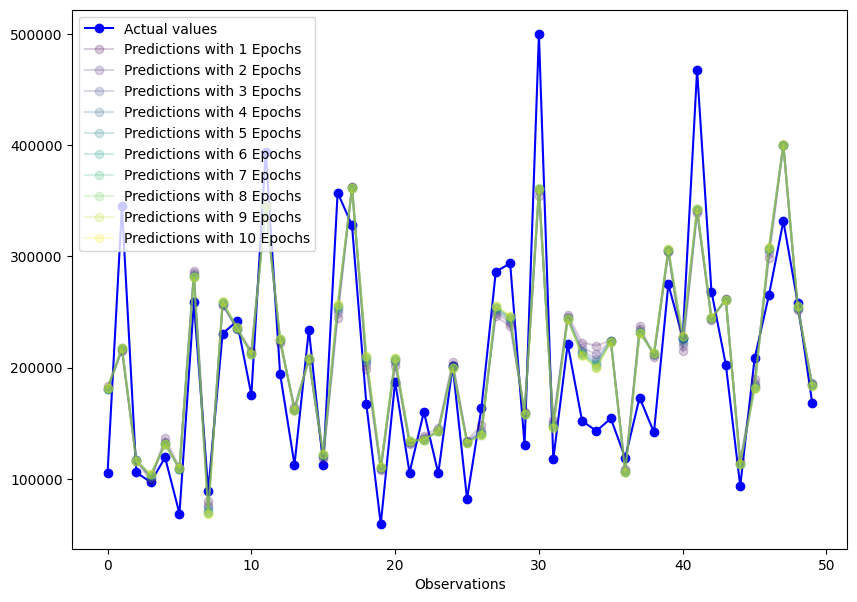

In [190]:
plt.figure(figsize=(10, 7))
colors = plt.cm.viridis(np.linspace(0, 1, 10))
plt.plot("index", "Actual values", label='Actual values', color='blue', marker='o', data=performance_df_sgd_scaled[:50])

for i in range(10):
  plt.plot("index", f"Predictions with {i+1} Epochs", label=f"Predictions with {i+1} Epochs", color=colors[i], marker='o', data=performance_df_sgd_scaled[:50], alpha=0.2)

plt.xlabel("Observations")
plt.legend()
plt.show()

# Sklearn SGD Unscaled


In [198]:
SGD_unscaled = SGDRegressor(max_iter=10, learning_rate="invscaling", eta0=0.01, random_state=52)
SGD_unscaled.fit(X_train, y_train)
y_pred_unscaled = SGD_unscaled.predict(X_test, )

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [199]:
print(f"R squared value is {pipeline.score(X_train, y_train)}")

R squared value is 0.6442581524533542


# OLS & SGD comparison

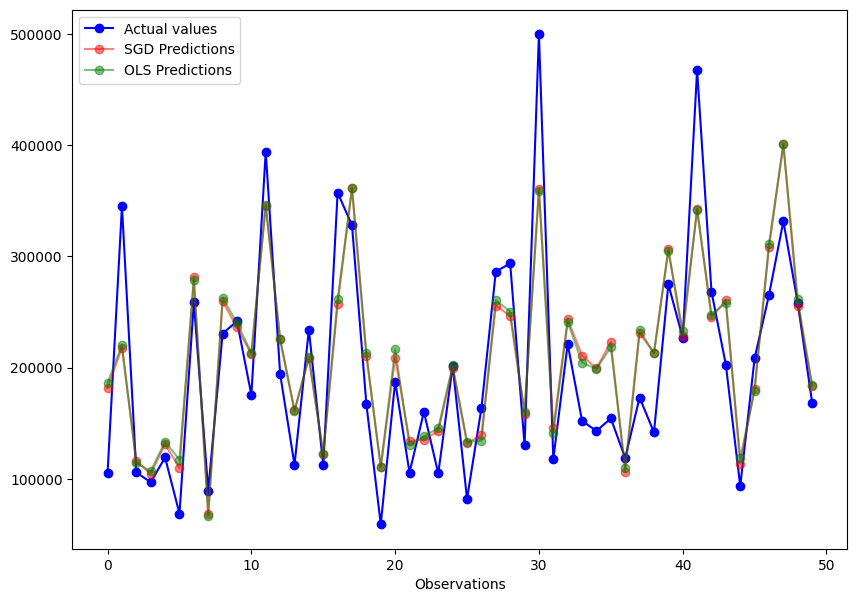

In [193]:
plt.figure(figsize=(10, 7))

plt.plot("index", "Actual values", label='Actual values', color='blue', marker='o', data=performance_df_sgd_scaled[:50])
plt.plot("index", "Predictions with 10 Epochs", label='SGD Predictions', color='red', marker='o', data=performance_df_sgd_scaled[:50], alpha=0.5)
plt.plot("index", "Predictions", label='OLS Predictions', color='green', marker='o', data=performance_df[:50], alpha=0.5)
plt.xlabel("Observations")
plt.legend()
plt.show()